<img src="https://www.python.org/static/img/python-logo.png">

# Welcome to my lessons

---

**Bo Zhang** (NAOC, <mailto:bozhang@nao.cas.cn>) will have a few lessons on python.

- These are **very useful knowledge, skills and code styles** when you use `python` to process astronomical data.
- All materials can be found on [**my github page**](https://github.com/hypergravity/cham_teaches_python).
- **jupyter notebook** (formerly named **ipython notebook**) is recommeded to use

---
These lectures are organized as below:
1. install python
2. basic syntax
3. numerical computing
4. scientific computing
5. plotting
6. astronomical data processing
7. high performance computing
8. version control


# Astronomical data format standard - .fits files
- HDUs
 * Primary HDU
 * Image HDU
 * BinTable HDU (Binary Table)
- HDU header
 - keywords
 - column information for tables
- HDU data

*reference*: 
- [http://fits.gsfc.nasa.gov/](http://fits.gsfc.nasa.gov/)
- [http://fits.gsfc.nasa.gov/fits_wcs.html](http://fits.gsfc.nasa.gov/fits_wcs.html)


## Usually, you will meet these:
- 1d image stored using WCS (world coordinate system)
 - SDSS DR7 spectra
 - IRAF spectra fits
- 2d image stored using WCS (world coordinate system)
 - all photometry images (2MASS, WISE, ...)
- table / catalog
 - LAMOST catalog
 - SDSS DR10/12 spectra

In [1]:
%pylab inline
from astropy.io import fits

# read hdu list
hl = fits.open('./data/lamost_dr2_spectra/spec-55892-F9205_sp09-174.fits')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# show fits info
print hl.info()

Filename: ./data/lamost_dr2_spectra/spec-55892-F9205_sp09-174.fits
No.    Name         Type      Cards   Dimensions   Format
0    Flux        PrimaryHDU     132   (3903, 5)    float32   
None


In [3]:
# read HDU header
hl[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11b        
BITPIX  =                  -32 /                                                
NAXIS   =                    2 / Number of array dimensions                     
NAXIS1  =                 3903 /                                                
NAXIS2  =                    5 /                                                
EXTEND  =                    T /                                                
                                                                                
COMMENT --------FILE INFORMATION                                                
FILENAME= 'spec-55892-F9205_sp09-174.fits' /                                    
OBSID   =                20566 / Unique number ID of this spectrum              
AUTHOR  = 'LAMOST Pipeline'    / Who compiled the information                   
DATA_V  = 'LAMOST DR3'         / Data release version                           
EXTEN0  = 'Flux, Inverse, Wa

In [4]:
# read HDU data
hl[0].data

array([[  1.73385332e+04,   1.78001680e+04,   1.74559727e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.20499998e-05,   5.11758699e-05,   5.23977396e-05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.69998633e+03,   3.70083838e+03,   3.70169067e+03, ...,
          9.08238965e+03,   9.08448047e+03,   9.08657324e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

In [5]:
# transform data to WVS coordinates
naxis1 = hl[0].header['NAXIS1']
crval1 = hl[0].header['CRVAL1']
crpix1 = hl[0].header['CRPIX1']
cdelt1 = hl[0].header['CD1_1']

wave = 10**( crval1 + (np.arange(naxis1)+1-crpix1)*cdelt1)
print wave

flux = hl[0].data[0, :]
print flux

[ 3699.98531173  3700.83736292  3701.68961033 ...,  9082.3869326
  9084.47847027  9086.57048958]
[ 17338.53320312  17800.16796875  17455.97265625 ...,      0.              0.
      0.        ]


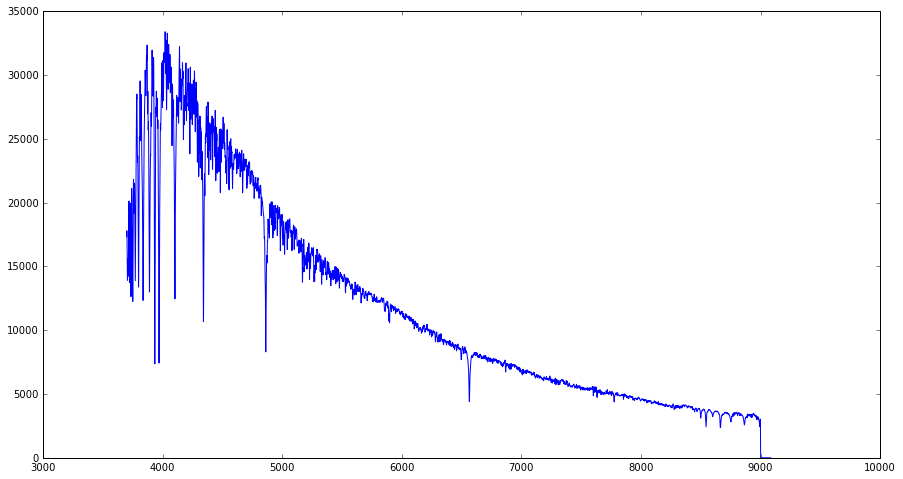

In [6]:
fig = plt.figure(figsize=(15,8 ))
plt.plot(wave, flux)

In [7]:
from astropy.table import Table, Column
spec_table = Table([Column(wave, 'wave'),
                    Column(flux, 'flux')])
# Table.write('./data/lamost_dr2_spectra/test_spec_table.fits')
spec_table.pprint


<bound method Table.pprint of <Table length=3903>
     wave       flux 
   float64    float32
------------- -------
3699.98531173 17338.5
3700.83736292 17800.2
3701.68961033 17456.0
  3702.542054 17002.9
3703.39469398 15677.3
 3704.2475303 14652.4
3705.10056302 14114.7
3705.95379218 13921.9
3706.80721783 14344.3
   3707.66084 14902.9
          ...     ...
9067.75964584     0.0
9069.84781506     0.0
9071.93646515     0.0
9074.02559623     0.0
 9076.1152084     0.0
9078.20530178     0.0
9080.29587648     0.0
 9082.3869326     0.0
9084.47847027     0.0
9086.57048958     0.0>

# how to convert (ra, dec) to (l, b)

In [8]:
%pylab
from astropy.coordinates import SkyCoord, Longitude, Latitude
import astropy.units as u

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [9]:
ra = Longitude([1, 2, 3], unit=u.deg)  # Could also use Angle
dec = np.array([4.5, 5.2, 6.3]) * u.deg  # Astropy Quantity
c = SkyCoord(ra, dec, frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    [(1.0, 4.5), (2.0, 5.2), (3.0, 6.3)]>

In [10]:
c.info()

dtype = object
unit = deg,deg
class = SkyCoord
n_bad = 0
length = 3


In [11]:
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    [(101.22678436, -56.35949807), (103.32241344, -56.00907284),
     (105.56483231, -55.23635591)]>

In [12]:
c.galactic.l, c.galactic.b

(<Longitude [ 101.22678436, 103.32241344, 105.56483231] deg>,
 <Latitude [-56.35949807,-56.00907284,-55.23635591] deg>)

# 2-D data (images)
recommended packages: **aplpy**, **healpy**

temporally these will not be introduced in our course

# HOMEWORK
1. download a LAMOST spectra, and write a function to read data in the fits file.

    requirements:
    1. usage
        ```python
        spec = read_spectrum_lamost('filepath')
        ```
    2. `spec` should be a 5-column table, including these data:
    
        `wavelength, flux, inverse variance, and-mask, or-mask`

hint: the data structure of LAMOST DR2 spectra fits files can be found [here](http://dr2.lamost.org/doc/data-production-description#toc_3)